## Exploring the Eye Tracking Data from the POET data set (for one image)

In [2]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

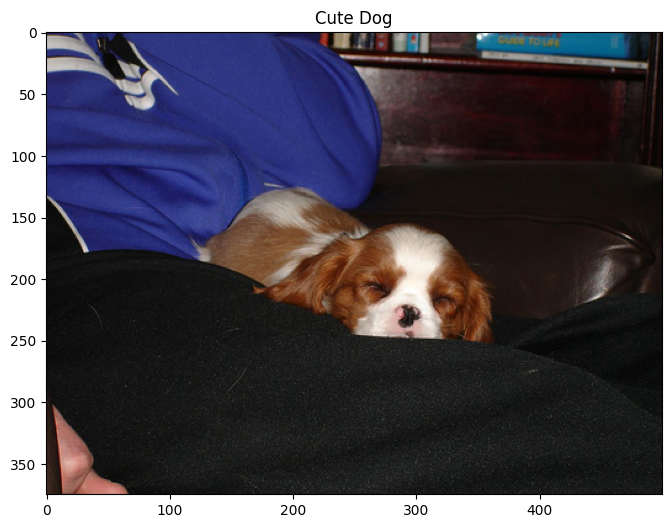

dict_keys(['__header__', '__version__', '__globals__', 'etData'])


In [3]:
# Load code for visualization --> Kaggle does not support matlab.engine


# Load image
image_path = '/kaggle/input/images/dog_2008_001921.jpg'

img = mpimg.imread(image_path)

# Plot the image
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(img)
plt.title('Cute Dog') 
plt.show()

# Load the .mat file
mat_data = scipy.io.loadmat('../input/dog-test-et/etData_dog.mat') # This is the eye tracking data for one class (dog), so for all 1257 images classified as dogs

print(mat_data.keys()) # keys of matlab data

In [5]:
print(f"etData: {type(mat_data['etData'])}, Shape: {mat_data['etData'].shape}") # Shape = [number of images for dog, eye tracking data for each image as a nested void array]

etData: <class 'numpy.ndarray'>, Shape: (1257, 1)


In [6]:
print(mat_data["etData"][0]) # eye tracking data for the first image as a nested array
print()
first_entry = mat_data["etData"][0][0] # first image 
print(f"Type of first image: {type(first_entry)}") # data for each image is a numpy.void = Represents a structured array, allowing mixed types within a single array.

[(array(['2008_001921'], dtype='<U11'), array([[375, 500,   3]], dtype=uint16), array([[115, 125, 363, 254]], dtype=uint16), array([[0.63364755, 0.74047264, 1.21070723, 0.80606817, 0.95798266]]), array([[1, 1, 1, 1, 1]], dtype=uint8), array([[1]], dtype=uint8), array([[ 658,  269, 1158,  644]], dtype=uint16), array([[(array([[(array([[(array([[  7, 202],
                                [230, 466],
                                [481, 873]], dtype=uint16), array([[876. , 548.7],
                                [940.2, 493.4],
                                [923.4, 488.3]]))                                 ]],
                       dtype=[('time', 'O'), ('pos', 'O')]), array([[(array([[  7., 200.],
                                [ nan,  nan],
                                [ nan,  nan]]), array([[859.9, 534.8],
                                [  nan,   nan],
                                [  nan,   nan]]))                     ]],
                       dtype=[('time', 'O'), ('pos',

In [7]:
print("Field names in first entry:", first_entry.dtype.names) # Check the fields in the first entry
print()
print(f"Filename: {first_entry['filename']}") # access filename of image 
print(f"Dimensions: {first_entry['dimensions']}") # a 1x2 double array with image dimensions, [height width]
print(f"gtbb: {first_entry['gtbb']}") # an Nx4 double array with the coordinates of the N ground-truth bounding-boxes, [x1 y1 x2 y2]
print(f"rt: {first_entry['rt']}")  # an 1x5 double array with the response times in seconds of the 5 different viewers
print(f"response: {first_entry['response'][0]}") # a 1x5 logical array with the correct button presses
print(f"imScalingFactor: {first_entry['imScalingFactor'][0]}") # the scaling factor used to diplay the image in the monitor
print(f"displayOffset: {first_entry['displayOffset'][0]}") # the coordinates of the window where the image was diplayed in the monitor with resolution 1680x1050

Field names in first entry: ('filename', 'dimensions', 'gtbb', 'rt', 'response', 'imScalingFactor', 'displayOffset', 'fixations')

Filename: ['2008_001921']
Dimensions: [[375 500   3]]
gtbb: [[115 125 363 254]]
rt: [[0.63364755 0.74047264 1.21070723 0.80606817 0.95798266]]
response: [1 1 1 1 1]
imScalingFactor: [1]
displayOffset: [ 658  269 1158  644]


### fixations - a 1x5 structure array with all information about the eye tracking data of 5 viewers scrnCoord 

- screen coordinates of the eye tracking data imgCoord 
- image coordinates of the eye tracking data

    - fixR - fixations of the right eye
    - fixL - fixations of the left eye

    - time - an Mx2 array with the initial and final time of the M fixation in ms
    - pos - an Mx2 array with the x and y coordinates of the fixation positions.
    
    
#### Description:

For one image, fixations is a 1x5 array (stores data for 5 viewers). We have two fields:

- scrnCoord: Represents screen coordinates of the fixations. This field contains a 2D array with (x, y) values that map where a viewer's gaze is on the screen.

- imgCoord: Represents image coordinates of the fixations, translating screen coordinates onto specific image points.

Then we have Our Fixation Data: Contains fixation data for each eye separately.

- fixR (Right Eye Fixations): Contains fixation data for the right eye.
- fixL (Left Eye Fixations): Contains fixation data for the left eye.

- Each fixation (fixR and fixL) for both eyes includes two subfields:
    - time: An 𝑀×2 where M is the number of fixations. Each row contains the start and end times of each fixation in milliseconds. HERE WE CAN EXTRACT THE DURATION (AIM FOR LONG ONES) AND STARTING POINTS (AIM FOR EARLY STARTING POINTS). USE THESE TO CHOOSE THE FIXATION POINTS.
    - pos: An M×2 array with the (x, y) coordinates of each fixation position, corresponding to the time intervals. OUR ACTUAL FIXATION POINTS.


In [8]:
print(first_entry['fixations']) # This is the data we need to extract fixation points from as a prompt for SAM

[[(array([[(array([[(array([[  7, 202],
                         [230, 466],
                         [481, 873]], dtype=uint16), array([[876. , 548.7],
                         [940.2, 493.4],
                         [923.4, 488.3]]))                                 ]],
                dtype=[('time', 'O'), ('pos', 'O')]), array([[(array([[  7., 200.],
                         [ nan,  nan],
                         [ nan,  nan]]), array([[859.9, 534.8],
                         [  nan,   nan],
                         [  nan,   nan]]))                     ]],
                dtype=[('time', 'O'), ('pos', 'O')]))                              ]],
        dtype=[('fixR', 'O'), ('fixL', 'O')]), array([[(array([[(array([[  7, 202],
                         [230, 466],
                         [481, 873]], dtype=uint16), array([[218. , 279.7],
                         [282.2, 224.4],
                         [265.4, 219.3]]))                                 ]],
                dtype=[('tim

In [21]:
print(len(first_entry['fixations'][0])) # 5 set of fixations (5 viewers)

print()

print("Fields for every viewer:", first_entry['fixations'].dtype.names) # fields for every viewer

print()

print(first_entry['fixations'][0][0]) # scrnCoord and imgCoord for the first viewer

print()

print("Fields for screen coordinates:", first_entry['fixations'][0][0][0].dtype.names) # fields for scrnCoord. Here we have information for each eye (RIGHT AND LEFT)

print()

print(first_entry['fixations'][0][0][0]['fixR']) # get time and pos for RIGHT eye

print()

print("Fields per eye", first_entry['fixations'][0][0][0]['fixR'][0][0].dtype.names) # fields for RIGHT eye (or generally for every eye)

print()

print(f"Fixation points for first image, first viewer, scrnCoord, right eye {first_entry['fixations'][0][0][0]['fixR'][0][0]['pos']}") # get the fixation points!

5

Fields for every viewer: ('scrnCoord', 'imgCoord')

(array([[(array([[(array([[  7, 202],
                       [230, 466],
                       [481, 873]], dtype=uint16), array([[876. , 548.7],
                       [940.2, 493.4],
                       [923.4, 488.3]]))                                 ]],
              dtype=[('time', 'O'), ('pos', 'O')]), array([[(array([[  7., 200.],
                       [ nan,  nan],
                       [ nan,  nan]]), array([[859.9, 534.8],
                       [  nan,   nan],
                       [  nan,   nan]]))                     ]],
              dtype=[('time', 'O'), ('pos', 'O')]))                              ]],
      dtype=[('fixR', 'O'), ('fixL', 'O')]), array([[(array([[(array([[  7, 202],
                       [230, 466],
                       [481, 873]], dtype=uint16), array([[218. , 279.7],
                       [282.2, 224.4],
                       [265.4, 219.3]]))                                 ]],
     

In [22]:
# now get all fixation points for the first viewer (only image coordinates)!

fixation_points = []

# Access the fixation data for the first viewer
for eye in ['fixR', 'fixL']:  # Iterate over both eyes (Right and Left)
    eye_data = first_entry['fixations'][0][0][1][eye]  # Access data for the eye (1 because we want image coordinates, not screen coordindates)
    pos_data = eye_data[0][0]['pos'][0]  # Get the position data (fixation points for one eye)
    tuples_list = [tuple(row) for row in data]
    for pos in tuples_list:
        fixation_points.append(pos)

# Print the collected fixation points
print("Fixation Points for the First Viewer (Image Coordinates):")
print(fixation_points)

Fixation Points for the First Viewer (Image Coordinates):
[(218.0, 279.7), (282.2, 224.4), (265.4, 219.3), (218.0, 279.7), (282.2, 224.4), (265.4, 219.3)]


### What kind of points and how many do we want to use as a prompt for SAM? Which are the most informative?

- Early points?
- Points that are fixated the longest? 
- Average the fixations of the 5 viewers?
- And I guess use image coordinates? There are 3 fixation points for the first image and first viewer per eye, which is not a lot?

$\rightarrow$ Research literature about that!


### Visualize fixations in the POET data set (for both eyes and only image coordinates)

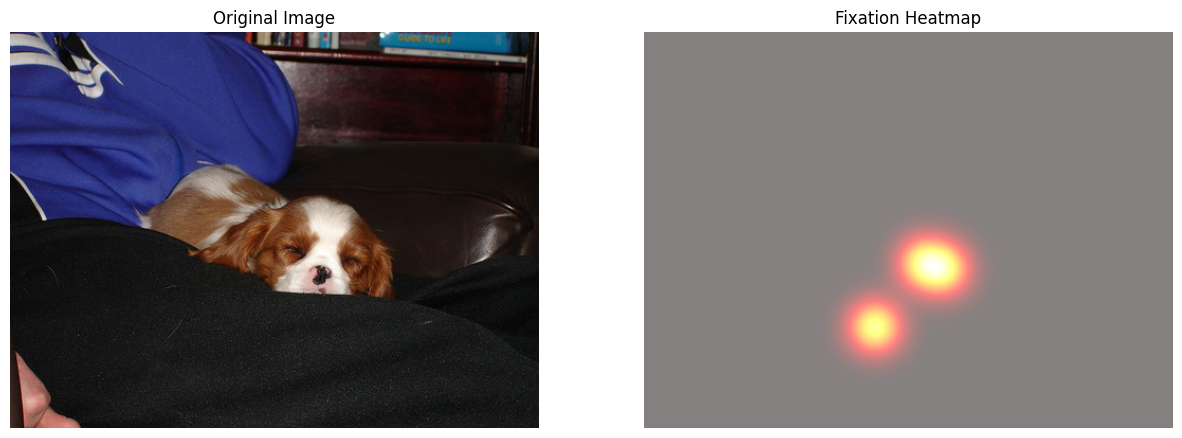

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def generate_heatmap(fixations, image_shape, sigma=15):
    heatmap = np.zeros(image_shape)
    for (x, y) in fixations:
        if 0 <= x < image_shape[1] and 0 <= y < image_shape[0]:
            cv2.circle(heatmap, (int(x), int(y)), 20, (1), -1)

    heatmap = cv2.GaussianBlur(heatmap, (0, 0), sigma)
    heatmap = np.clip(heatmap, 0, 1)
    return heatmap

# Load the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Example fixation data
fixation_points
image_shape = img.shape[:2]  # Shape of the image (height, width)

# Generate heatmap
heatmap = generate_heatmap(fixation_points, image_shape)

# Display the original image and heatmap
plt.figure(figsize=(15, 10))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

# Plot heatmap
plt.subplot(1, 2, 2)
plt.imshow(heatmap, cmap='hot', alpha=0.5)
plt.axis('off')
plt.title('Fixation Heatmap')

plt.show()

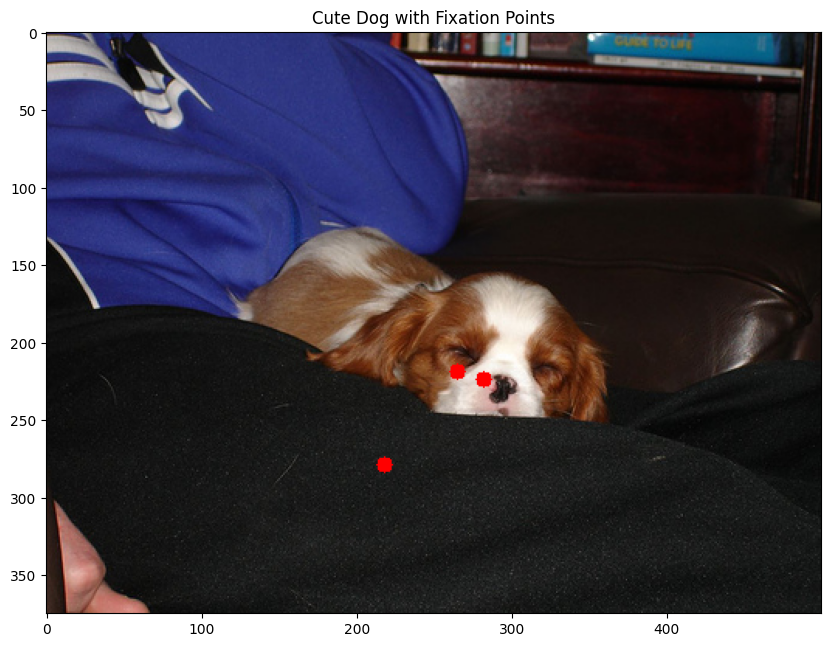

In [27]:
def plot_fixations_on_image(img, fixations):
    # Create a copy of the image to draw on
    img_with_fixations = img.copy()

    # Draw fixation points on the image
    for (x, y) in fixations:
        if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
            cv2.circle(img_with_fixations, (int(x), int(y)), 5, (255, 0, 0), -1) 

    return img_with_fixations

# Load the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot fixation points on the original image
img_with_fixations = plot_fixations_on_image(img, fixation_points)

# Display the image with fixation points
plt.figure(figsize=(10, 10))
plt.imshow(img_with_fixations)
plt.title('Cute Dog with Fixation Points')
plt.show()